In [2]:
pip install soundscapy
pip install soundscapy[audio]
pip install scipy==1.14.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 32.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.8/856.8 kB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 15.3 MB/s eta 0:00:00
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160672 sha256=b8fb455df9675d3c730ce204616ab27193697dd886afc961b09d39f2be169f4a
  Stored in directory: /root/.cache/pip/wheels/d6/1d/c8/8c29be1d73ca42d15977c75193d9f39a98499413c2838ac54c
Successfully built odfpy
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
    

In [5]:
from soundscapy import AudioAnalysis
from soundscapy import AnalysisSettings
from soundscapy import Binaural
import json
from pathlib import Path
import sys
sys.path.append('../..')
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.11/dist-packages/soundscapy/surveys/processing.py:31: UserWarning: legacy printing option can currently only be '1.13', '1.21', or `False`
  np.set_printoptions(legacy="1.25")
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: 

In [6]:
analysis = AudioAnalysis()

In [7]:
import json

# Open and load the JSON file
with open("Levels.json", "r") as f:
    levels = json.load(f)
# Verify the structure of the levels data
print("Available keys in levels:", levels.keys())


{'CT101': {'Left': 79.0, 'Right': 79.72}, 'CT102': {'Left': 79.35, 'Right': 79.88}, 'CT103': {'Left': 76.25, 'Right': 76.41}, 'CT104': {'Left': 79.9, 'Right': 79.93}, 'CT107': {'Left': 78.21, 'Right': 78.47}, 'CT108': {'Left': 79.23, 'Right': 79.51}, 'CT109': {'Left': 79.32, 'Right': 79.37}, 'CT110': {'Left': 78.15, 'Right': 80.09}, 'CT112': {'Left': 79.08, 'Right': 79.77}, 'CT113': {'Left': 81.32, 'Right': 81.67}, 'CT114': {'Left': 76.69, 'Right': 76.94}, 'CT116': {'Left': 77.88, 'Right': 78.82}, 'CT117': {'Left': 80.18, 'Right': 80.54}, 'CT119': {'Left': 76.45, 'Right': 77.0}, 'CT120': {'Left': 79.9, 'Right': 80.27}, 'CT121': {'Left': 78.14, 'Right': 78.51}, 'CT122': {'Left': 80.88, 'Right': 81.3}, 'CT123': {'Left': 77.46, 'Right': 77.9}, 'CT124': {'Left': 78.14, 'Right': 78.49}, 'CT201': {'Left': 76.79, 'Right': 76.81}, 'CT202': {'Left': 82.07, 'Right': 82.74}, 'CT203': {'Left': 77.48, 'Right': 77.47}, 'CT301': {'Left': 75.84, 'Right': 78.33}, 'CT305': {'Left': 83.14, 'Right': 81.74

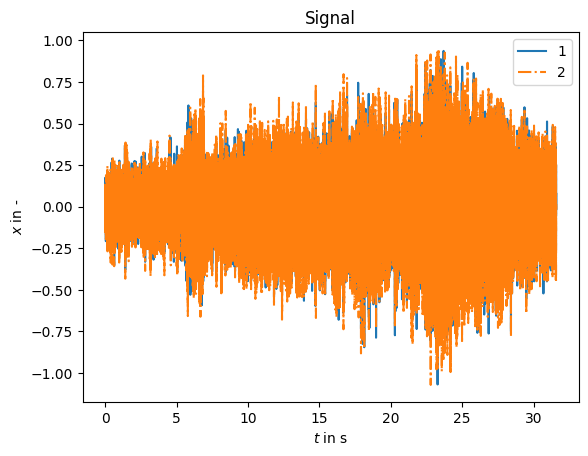

In [11]:
binaural_wav = "CT101.wav"
b = Binaural.from_wav(binaural_wav)
b.plot();

In [12]:
metric = "LAeq"
stats = ("avg", 10, 50, 90, 95, "max")
label = "LAeq"
b.pyacoustics_metric(metric, stats, label, as_df=False)

{'Left': {'LAeq': 68.88632333096334,
  'LAeq_10': 71.16496230244609,
  'LAeq_50': 68.1239594199718,
  'LAeq_90': 63.38571103018755,
  'LAeq_95': 62.37715338983665,
  'LAeq_max': 77.39327100442499},
 'Right': {'LAeq': 69.95669922518547,
  'LAeq_10': 72.58151729320674,
  'LAeq_50': 68.49876437143385,
  'LAeq_90': 64.53642254942189,
  'LAeq_95': 63.101025031434546,
  'LAeq_max': 78.71214919676744}}

In [ ]:
metric = "loudness_zwtv"
stats = (5, 50, 'avg', 'max')
func_args = {
    'field_type': 'free'
}

b.mosqito_metric(metric, statistics=stats, as_df=True, parallel=True, func_args=func_args)

N_5       N_50      N_avg      N_max
Recording Channel                                            
CT101     Left     28.854198  23.180510  22.685048  36.185207
          Right    30.841345  23.944455  23.779229  37.771262

In [ ]:
#speed up the processing time since it calculates the Sharpness values from pre-calculated Loudness results
b.mosqito_metric("sharpness_din_from_loudness", stats, as_df=True, parallel=True, func_args=func_args)

N_5       N_50      N_avg      N_max       S_5  \
Recording Channel                                                         
CT101     Left     28.854198  23.180510  22.685048  36.185207  1.339040   
          Right    30.841345  23.944455  23.779229  37.771262  1.410232   

                       S_50     S_avg      S_max  
Recording Channel                                 
CT101     Left     1.169012  1.181892  19.295305  
          Right    1.183660  1.202712  18.596981

In [13]:
# Combine loudness, sharpness, and roughness together
metrics = ["loudness_zwtv", "sharpness_din_from_loudness", "roughness"]

# Define the statistics to compute
stats = (5, 50, 'avg', 'max')

# Additional arguments for the analysis function
func_args = {'field_type': 'free'}

# Compute each metric separately and store results
results = {}

for metric in metrics:
    print(f"Computing {metric}...")
    results[metric] = b.mosqito_metric(metric, statistics=stats, as_df=True, parallel=True, func_args=func_args)

# Combine all results into a single DataFrame
import pandas as pd
final_results = pd.concat(results.values(), axis=1)

# Display the final results
print(final_results)

Computing loudness_zwtv...


KeyboardInterrupt: 

In [14]:
#Step2: Apply bandstop filter
import numpy as np
import scipy.signal as signal
import librosa
import librosa.display
import matplotlib.pyplot as plt
import soundfile as sf

In [15]:
# Load audio file
y, sr = librosa.load(binaural_wav, sr=None, mono=False)

In [16]:
# Double check if it is loaded as 2-channel binaural
import librosa
# Print shape information
print(f"Audio Shape: {y.shape}")
print(f"Sample Rate: {sr} Hz")

# Check if it's mono or stereo
if y.ndim == 1:
    print("The audio is MONO.")
elif y.ndim == 2 and y.shape[0] == 2:
    print("The audio is STEREO (2-channel binaural).")
else:
    print(f"Unexpected shape: {y.shape}")


Audio Shape: (2, 1515520)
Sample Rate: 48000 Hz
The audio is STEREO (2-channel binaural).


In [17]:
# Define Notch Filter Function to Reduce SPL by 20 dB
#quality_factor: Controls the sharpness of the notch (higher Q = narrower filter)
#fs: The sampling rate of the audio (needed for filter design)
def notch_filter(data, center_freq, fs, attenuation_db=20, quality_factor=5):
    nyquist = 0.5 * fs
    gain_linear = 10 ** (-attenuation_db / 20)  # Convert dB attenuation to linear scale

    # Apply filter separately to each channel
    filtered_data = np.copy(data)
    b, a = signal.iirnotch(w0=center_freq / nyquist, Q=quality_factor)

    for i in range(filtered_data.shape[0]):  # Process each channel
        filtered_data[i] = signal.lfilter(b, a, filtered_data[i])  # Apply notch once

    return filtered_data

# Load original audio
file_path = "CT101.wav"
y, sr = sf.read(file_path)

# Fix shape for stereo processing
if len(y.shape) == 1:
    y = np.vstack([y, y])
elif y.shape[1] == 2:
    y = y.T

print(f"Fixed audio shape for processing: {y.shape}")

# Apply notch filter at **only 200 Hz** with a **wider Q factor**
y_filtered = notch_filter(y, center_freq=200, fs=sr, attenuation_db=20, quality_factor=5)

# Normalize safely
max_value = np.max(np.abs(y_filtered))
if max_value > 1e-5:
    y_filtered /= max_value

# Convert back to (samples, channels) for saving
y_filtered = y_filtered.T



Fixed audio shape for processing: (2, 1515520)


In [18]:
# Ensure the filtered signal is normalized
y_filtered = y_filtered / np.max(np.abs(y_filtered))  # Normalize to [-1, 1]

# Save the filtered stereo audio as FLOAT to avoid high SPL errors
filtered_file_path = "CT101_filtered.wav"
sf.write(filtered_file_path, y_filtered.astype(np.float32), sr)

print(f"✅ Filtered audio successfully saved with proper normalization: {filtered_file_path}")


✅ Filtered audio successfully saved with proper normalization: CT101_filtered.wav


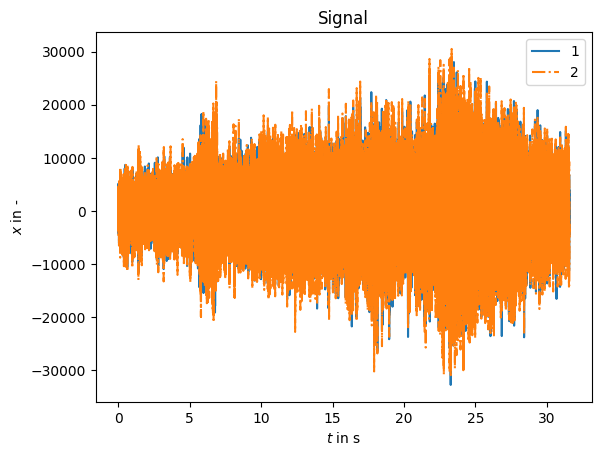

In [19]:
binaural_wav = "CT101_filtered.wav"
b = Binaural.from_wav(binaural_wav)
b.plot();

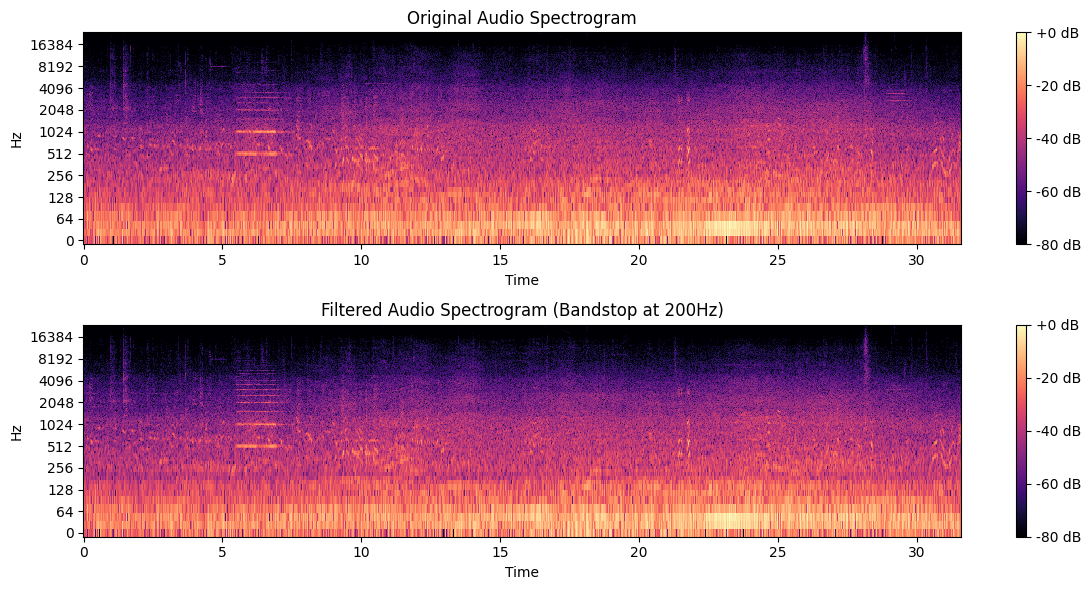

In [21]:
# Step3: Comparison of original and filtered audio
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf

# Load both original and filtered audio
file_path_original = "CT101.wav"
file_path_filtered = "CT101_filtered.wav"

y_original, sr = sf.read(file_path_original)
y_filtered, sr = sf.read(file_path_filtered)

# Convert stereo to mono for visualization (averaging both channels)
y_original_mono = np.mean(y_original, axis=1)
y_filtered_mono = np.mean(y_filtered, axis=1)

# Compute spectrograms
plt.figure(figsize=(12, 6))

# Original Spectrogram
plt.subplot(2, 1, 1)
D_original = librosa.amplitude_to_db(np.abs(librosa.stft(y_original_mono)), ref=np.max)
librosa.display.specshow(D_original, sr=sr, x_axis="time", y_axis="log")
plt.title("Original Audio Spectrogram")
plt.colorbar(format="%+2.0f dB")

# Filtered Spectrogram
plt.subplot(2, 1, 2)
D_filtered = librosa.amplitude_to_db(np.abs(librosa.stft(y_filtered_mono)), ref=np.max)
librosa.display.specshow(D_filtered, sr=sr, x_axis="time", y_axis="log")
plt.title("Filtered Audio Spectrogram (Bandstop at 200Hz)")
plt.colorbar(format="%+2.0f dB")

plt.tight_layout()
plt.show()


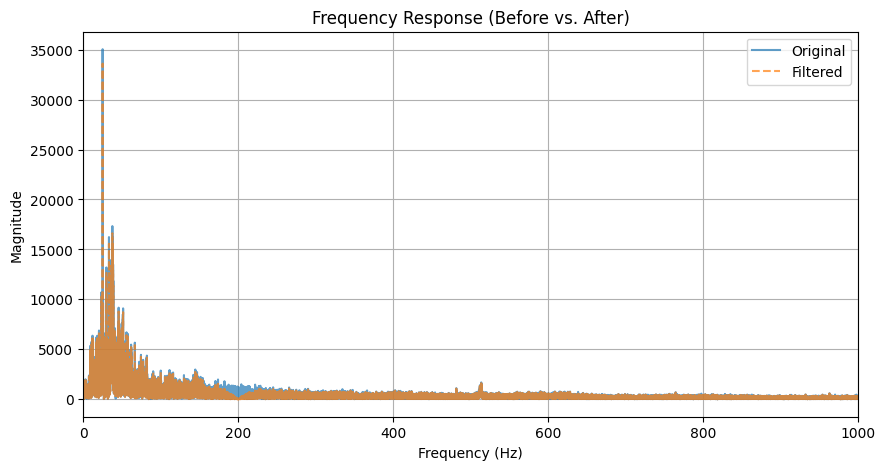

In [22]:
import scipy.fftpack

# Compute FFT for both signals
def compute_fft(y, sr):
    N = len(y)
    freq = np.fft.rfftfreq(N, d=1/sr)  # Frequency axis
    fft_magnitude = np.abs(np.fft.rfft(y))  # Magnitude spectrum
    return freq, fft_magnitude

freq, fft_original = compute_fft(y_original_mono, sr)
freq, fft_filtered = compute_fft(y_filtered_mono, sr)

# Plot frequency response
plt.figure(figsize=(10, 5))
plt.plot(freq, fft_original, label="Original", alpha=0.7)
plt.plot(freq, fft_filtered, label="Filtered", alpha=0.7, linestyle="--")
plt.xlim(0, 1000)  # Show only up to 1000Hz
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Response (Before vs. After)")
plt.legend()
plt.grid()
plt.show()


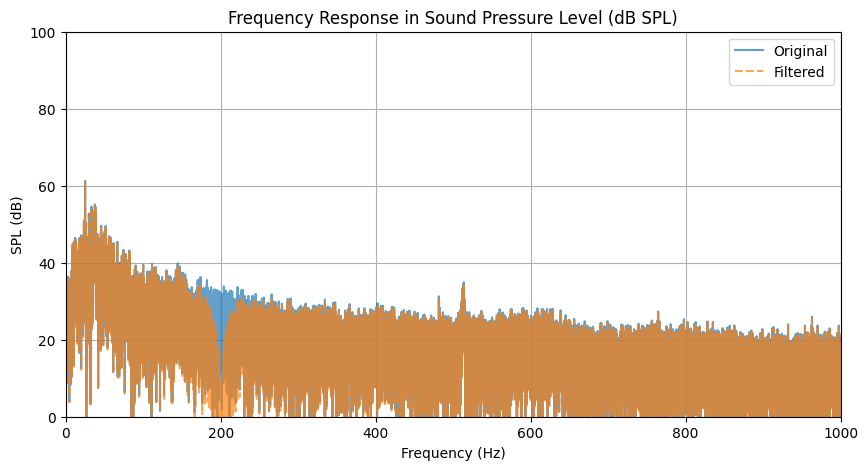

In [23]:
# Reference sound pressure level in air (20 µPa)
P_ref = 20e-6

# Compute FFT for both signals and convert to SPL
def compute_fft_spl(y, sr):
    N = len(y)  # Number of samples
    freq = np.fft.rfftfreq(N, d=1/sr)  # Frequency axis
    fft_magnitude = np.abs(np.fft.rfft(y)) / N  # Normalize FFT magnitude

    # Convert magnitude to Sound Pressure Level (SPL in dB)
    fft_spl = 20 * np.log10(np.maximum(fft_magnitude, 1e-12) / P_ref)  # Avoid log10(0)

    return freq, fft_spl

# Compute SPL from FFT
freq, spl_original = compute_fft_spl(y_original_mono, sr)
freq, spl_filtered = compute_fft_spl(y_filtered_mono, sr)

# Plot frequency response in dB SPL
plt.figure(figsize=(10, 5))
plt.plot(freq, spl_original, label="Original", alpha=0.7)
plt.plot(freq, spl_filtered, label="Filtered", alpha=0.7, linestyle="--")
plt.xlim(0, 1000)  # Show only up to 1000Hz
plt.ylim(0, 100)  # Adjusted realistic SPL range
plt.xlabel("Frequency (Hz)")
plt.ylabel("SPL (dB)")
plt.title("Frequency Response in Sound Pressure Level (dB SPL)")
plt.legend()
plt.grid()
plt.show()



In [24]:
# Load the filtered binaural audio
binaural_wav_filtered = "CT101_filtered.wav"
b_filtered = Binaural.from_wav(binaural_wav_filtered)

# Get the actual audio signal (convert from memoryview to NumPy array)
audio_data = np.array(b_filtered.data, dtype=np.float32)  # Convert to NumPy array
print(f"Original max amplitude: {np.max(np.abs(audio_data))}")

# Compute the correct SPL calibration factor using RMS
original_max_spl = 69  # Adjust this based on the original LAeq (try 60-80 dB)
rms_value = np.sqrt(np.mean(audio_data**2))  # Compute RMS

# Reference pressure for SPL calibration
P_ref = 20e-6  # Reference pressure in Pascals (20 µPa)

# Convert SPL to a linear calibration factor (correct formula)
calibration_factor = (10**(original_max_spl / 20) * P_ref) / rms_value

# Scale the signal safely
audio_data *= calibration_factor  # Apply calibration
print(f"Scaled max amplitude: {np.max(np.abs(audio_data))}")
print(f"Scaled RMS amplitude: {np.sqrt(np.mean(audio_data**2))}")  # Verify RMS scaling

# Ensure C-contiguous format before converting back to memoryview
audio_data = np.ascontiguousarray(audio_data)

# Replace the modified signal in the Binaural object
b_filtered.data = memoryview(audio_data)  # Convert back to memoryview

# Compute LAeq after fixing signal scaling
metric = "LAeq"
stats = ("avg", 10, 50, 90, 95, "max")  # Statistics to compute
label = "LAeq"

laeq_filtered = b_filtered.pyacoustics_metric(metric, stats, label, as_df=True)
print(laeq_filtered)


Original max amplitude: 32768.0
Scaled max amplitude: 0.319318950176239
Scaled RMS amplitude: 0.0563676692545414
                             LAeq    LAeq_10    LAeq_50    LAeq_90    LAeq_95  \
Recording      Channel                                                          
CT101_filtered Left     61.416278  63.654368  60.467419  56.144398  55.110626   
               Right    61.416186  63.654986  60.467939  56.144624  55.109115   

                         LAeq_max  
Recording      Channel             
CT101_filtered Left     69.561152  
               Right    69.561710  


In [25]:
b_filtered.pyacoustics_metric(metric, stats, label, as_df=True)

LAeq    LAeq_10    LAeq_50    LAeq_90    LAeq_95  \
Recording      Channel                                                          
CT101_filtered Left     61.416278  63.654368  60.467419  56.144398  55.110626   
               Right    61.416186  63.654986  60.467939  56.144624  55.109115   

                         LAeq_max  
Recording      Channel             
CT101_filtered Left     69.561152  
               Right    69.561710

In [ ]:
metric = "loudness_zwtv"
stats = (5, 50, "avg", "max")  # Compute different statistical values
func_args = {"field_type": "free"}  # Use free-field conditions

# Compute Loudness for filtered audio
loudness_filtered = b_filtered.mosqito_metric(metric, statistics=stats, as_df=True, parallel=True, func_args=func_args)
print(loudness_filtered)

                              N_5       N_50      N_avg      N_max
Recording      Channel                                            
CT101_filtered Left     19.101607  15.100972  14.866982  22.689795
               Right    19.101213  15.100259  14.866962  22.689618


In [ ]:
# computing sharpness and roughness as above